# Q3

In [1]:
%matplotlib inline

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms

In [3]:
transform = transforms.Compose( 
    [transforms.ToTensor(),
      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
class_names = trainset.classes
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)
classes = ('plane', 'car', 'bird', 'cat',
'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [4]:
len(trainset)
len(trainloader)

12500

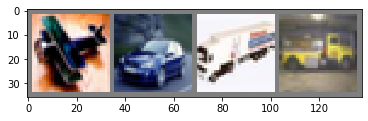

plane   car truck truck


In [5]:
import matplotlib.pyplot as plt 
import numpy as np
# functions to show an image

def imshow(img):
    img = img / 2 + 0.5 # unnormalize 
    npimg = img.numpy() 
    plt.imshow(np.transpose(npimg, (1, 2, 0))) 
    plt.show()

# get some random training images
dataiter = iter(trainloader) 
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [6]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module): 
    def __init__(self):
        super(Net, self).__init__() 
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2) 
        self.conv2 = nn.Conv2d(6, 16, 5) 
        self.fc1 = nn.Linear(16 * 5 * 5, 120) 
        self.fc2 = nn.Linear(120, 84) 
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x))) 
        x = self.pool(F.relu(self.conv2(x))) 
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

In [7]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# Assuming that we are on a CUDA machine, this should print a CUDA device: 
print(device)
net.to(device)

cuda:0


Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [8]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [9]:
from tqdm import tqdm
lossf = []
for epoch in range(2): # loop over the dataset multiple times
    running_loss = 0.0
    #for i, data in tqdm(enumerate(trainloader, 0)):
    for i, data in enumerate(trainloader, 0):
    # get the inputs; data is a list of [inputs, labels] 
        inputs, labels = data
        inputs, labels = data[0].to(device), data[1].to(device) 
        # zero the parameter gradients
        optimizer.zero_grad()

            # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels) 
        loss.backward()
        optimizer.step()

            # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999: # print every 2000 mini-batches

            print('[%d, %5d] loss: %.3f' %
                    (epoch + 1, i + 1, running_loss / 2000))
            lossf.append(running_loss / 2000)
            running_loss = 0.0 
        
print('Finished Training')

[1,  2000] loss: 2.245
[1,  4000] loss: 1.925
[1,  6000] loss: 1.706
[1,  8000] loss: 1.609
[1, 10000] loss: 1.556
[1, 12000] loss: 1.526
[2,  2000] loss: 1.463
[2,  4000] loss: 1.406
[2,  6000] loss: 1.396
[2,  8000] loss: 1.380
[2, 10000] loss: 1.348
[2, 12000] loss: 1.312
Finished Training


Text(0, 0.5, 'loss')

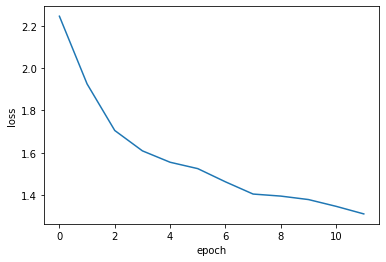

In [10]:
import matplotlib.pyplot as plt
plt.plot(lossf)
plt.xlabel('epoch')
plt.ylabel('loss')

In [11]:
def visualize_model(model, num_images=4):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(trainloader,0):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title('predicted: {}'.format([class_names[j]]))
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)


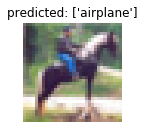

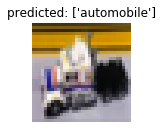

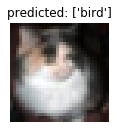

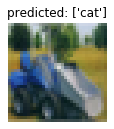

In [12]:
visualize_model(net)

In [19]:
data = net.conv1(inputs).cpu().data.numpy()
data = data[0]
print(data.shape)

(6, 28, 28)


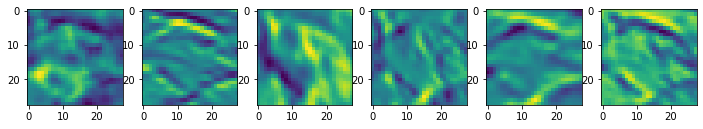

In [20]:
kernel_num = data.shape[0]

fig, axes = plt.subplots(ncols=kernel_num, figsize=(2*kernel_num, 2))

for col in range(kernel_num):
    axes[col].imshow(data[col, :, :])
plt.show()

In [21]:
PATH = './cifar_net.pth' 
torch.save(net.state_dict(), PATH)

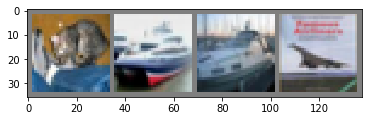

GroundTruth:    cat  ship  ship plane


In [22]:
dataiter = iter(testloader) 
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [23]:
net = Net() 
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [24]:
outputs = net(images)

In [25]:
 _, predicted = torch.max(outputs, 1)
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

Predicted:    cat   car  ship  ship


In [26]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1) 
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print('Accuracy of the network on the 10000 test images: %d %%' % ( 100 * correct / total))

Accuracy of the network on the 10000 test images: 49 %


In [27]:
class_correct = list(0. for i in range(10)) 
class_total = list(0. for i in range(10)) 
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1) 
        c = (predicted == labels).squeeze() 
        for i in range(4):
            label = labels[i] 
            class_correct[label] += c[i].item() 
            class_total[label] += 1
            
for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 45 %
Accuracy of   car : 88 %
Accuracy of  bird : 27 %
Accuracy of   cat : 35 %
Accuracy of  deer : 37 %
Accuracy of   dog : 45 %
Accuracy of  frog : 42 %
Accuracy of horse : 58 %
Accuracy of  ship : 73 %
Accuracy of truck : 38 %


In [28]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# Assuming that we are on a CUDA machine, this should print a CUDA device: 
print(device)

cuda:0


In [29]:
net.to(device)
inputs, labels = data[0].to(device), data[1].to(device)